# Chapter 14: The Future of AI Trading and Continuous Growth

## 1. Emerging Technologies: Generative AI for Strategy Discovery, Quantum Computing Applications

Generative AI, particularly models like Generative Adversarial Networks (GANs), can be used to create synthetic financial data that mimics the statistical properties of real market data. This is useful for training and testing trading models, especially in data-scarce environments. Furthermore, generative models can be used to explore and discover novel trading strategies by generating new trading rules or signals.

Quantum computing, while still in its early stages, holds the promise of solving certain types of problems much faster than classical computers. In finance, this could revolutionize areas like portfolio optimization and risk management, which often involve complex, computationally intensive calculations.

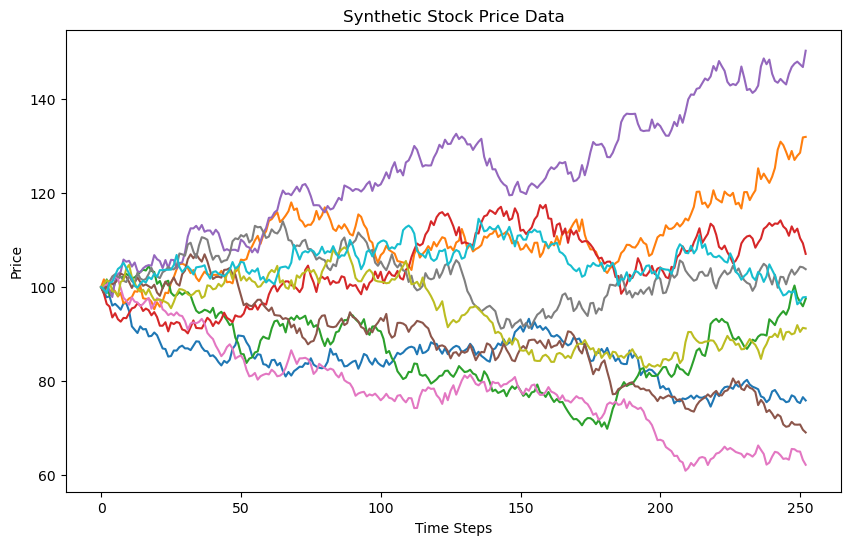

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic stock price data using a geometric Brownian motion model
def generate_synthetic_prices(initial_price, drift, volatility, time_steps, num_paths):
    dt = 1 / time_steps
    prices = np.zeros((time_steps + 1, num_paths))
    prices[0] = initial_price
    for t in range(1, time_steps + 1):
        random_shocks = np.random.standard_normal(num_paths)
        prices[t] = prices[t - 1] * np.exp((drift - 0.5 * volatility**2) * dt +
                                           volatility * np.sqrt(dt) * random_shocks)
    return prices

# Parameters
initial_price = 100
drift = 0.05  # 5% annual drift
volatility = 0.2  # 20% annual volatility
time_steps = 252  # Number of trading days in a year
num_paths = 10  # Number of synthetic price paths to generate

# Generate and plot the synthetic data
synthetic_prices = generate_synthetic_prices(initial_price, drift, volatility, time_steps, num_paths)

plt.figure(figsize=(10, 6))
plt.plot(synthetic_prices)
plt.title('Synthetic Stock Price Data')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.show()

## 2. Small Language Models and Edge AI for Trading

Large Language Models (LLMs) have shown remarkable capabilities in understanding and processing text. However, their size and computational requirements can be a bottleneck for real-time trading applications. Smaller, more efficient language models, deployed on "edge" devices (like a trader's local machine), offer a solution. These models can provide low-latency sentiment analysis of news feeds, social media, or even regulatory filings, enabling faster and more informed trading decisions without the need to send sensitive data to the cloud.

In [2]:
from transformers import pipeline

# Load a pre-trained sentiment analysis model
sentiment_analyzer = pipeline('sentiment-analysis')

# Analyze the sentiment of a news headline
headline = "The new product launch is expected to significantly boost the company's revenue."
result = sentiment_analyzer(headline)

print(f"Headline: {headline}")
print(f"Sentiment: {result[0]['label']} (Score: {result[0]['score']:.4f})")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


Headline: The new product launch is expected to significantly boost the company's revenue.
Sentiment: POSITIVE (Score: 0.9993)


## 3. Advanced Explainable AI and Causal Inference in Finance

As AI models become more complex, it's increasingly important to understand how they arrive at their decisions. Explainable AI (XAI) techniques like SHAP (SHapley Additive exPlanations) and LIME (Local Interpretable Model-agnostic Explanations) help to open up the "black box" of AI models, providing insights into which features are driving their predictions.

Causal inference goes a step further than just correlation, aiming to understand the cause-and-effect relationships in data. This is crucial in finance for building robust trading strategies that are less likely to break down when market conditions change.

In [10]:
import shap
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Create some dummy data
X = np.random.rand(100, 5)
y = X[:, 0] + 2 * X[:, 1] + np.random.rand(100)

# Train a model
model = RandomForestRegressor()
model.fit(X, y)

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Visualize the explanation for the first prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X[0,:])

## 4. Next-Generation Metric Frameworks and Performance Attribution

Traditional performance metrics like the Sharpe ratio have their limitations. Next-generation metric frameworks provide a more comprehensive view of a strategy's performance by incorporating measures of tail risk (like the Sortino ratio and Calmar ratio), drawdown analysis, and other behavioral factors. Performance attribution helps to decompose a portfolio's returns into the contributions of different factors or decisions, providing a clearer picture of what's driving performance.

In [12]:
import numpy as np
import pandas as pd

def calculate_advanced_metrics(returns):
    """
    Calculates the Sortino ratio and Calmar ratio for a series of returns.
    """
    # Sortino Ratio
    target_return = 0
    downside_returns = returns[returns < target_return]
    downside_deviation = np.std(downside_returns)
    annualized_return = np.mean(returns) * 252
    sortino_ratio = annualized_return / downside_deviation if downside_deviation != 0 else 0

    # Calmar Ratio
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = drawdown.min()
    calmar_ratio = annualized_return / abs(max_drawdown) if max_drawdown != 0 else 0

    return {
        "Sortino Ratio": sortino_ratio,
        "Calmar Ratio": calmar_ratio,
        "Max Drawdown": max_drawdown
    }

# Example usage with some dummy returns
returns = np.random.randn(252) * 0.01
metrics = calculate_advanced_metrics(pd.Series(returns))
print(metrics)

{'Sortino Ratio': np.float64(21.12688618062937), 'Calmar Ratio': np.float64(0.7149003326623341), 'Max Drawdown': np.float64(-0.20658970025924803)}


## 5. Building a Continuous Learning Culture: Research, Experimentation, Innovation

The financial markets are constantly evolving, so a "set and forget" approach to algorithmic trading is doomed to fail. The most successful quantitative trading firms foster a culture of continuous learning, research, and experimentation. This involves staying up-to-date with the latest academic research, constantly testing new ideas and strategies, and encouraging an innovative mindset that is not afraid to challenge the status quo.

## 6. Career Development: From Junior ML Engineer to Senior Quant Developer

Clear career pathways and skills development plans help grow talent pools to meet the evolving demands of AI trading.

## 7. Industry Trends: DeFi, Crypto Trading, ESG Integration

Decentralized finance, cryptocurrency markets, and environmental, social, and governance (ESG) factors are driving new opportunities and challenges in AI trading.

- DeFi and Crypto Trading: Decentralized Finance (DeFi) and cryptocurrencies represent a new and rapidly growing asset class. The high volatility and unique market structure of these assets present both opportunities and challenges for AI-based trading strategies.
- ESG Integration: Environmental, Social, and Governance (ESG) factors are becoming increasingly important for investors. AI can be used to analyze alternative data sources (like news articles, social media, and satellite imagery) to assess a company's ESG performance and incorporate this information into trading decisions.

/var/folders/98/pgyvqp115_q7lctf5vvv65gr0000gp/T/ipykernel_93304/65470095.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc_data = yf.download('BTC-USD', start='2023-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed

Price              Close          High           Low          Open  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2023-01-01  16625.080078  16630.439453  16521.234375  16547.914062   
2023-01-02  16688.470703  16759.343750  16572.228516  16625.509766   
2023-01-03  16679.857422  16760.447266  16622.371094  16688.847656   
2023-01-04  16863.238281  16964.585938  16667.763672  16680.205078   
2023-01-05  16836.736328  16884.021484  16790.283203  16863.472656   

Price            Volume  
Ticker          BTC-USD  
Date                     
2023-01-01   9244361700  
2023-01-02  12097775227  
2023-01-03  13903079207  
2023-01-04  18421743322  
2023-01-05  13692758566  


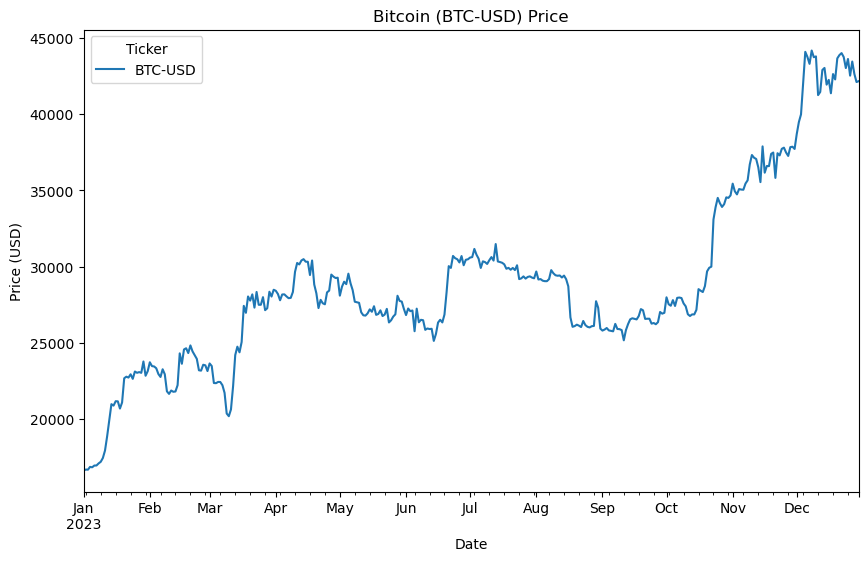

In [14]:
import yfinance as yf

# Fetch historical data for Bitcoin (BTC-USD)
btc_data = yf.download('BTC-USD', start='2023-01-01', end='2023-12-31')

# Display the first few rows of the data
print(btc_data.head())

# Plot the closing price
btc_data['Close'].plot(figsize=(10, 6))
plt.title('Bitcoin (BTC-USD) Price')
plt.ylabel('Price (USD)')
plt.show()

## 8. Personal Learning Roadmap and Resource Compilation

For those looking to deepen their knowledge of AI in trading, here is a suggested learning roadmap and a list of valuable resources:

Learning Roadmap:

Foundations:

- Python for data science (pandas, NumPy, scikit-learn)
- Financial market fundamentals (asset classes, market structure, basic derivatives)
- Statistics and probability

Core Machine Learning:

- Supervised and unsupervised learning
- Feature engineering and selection
- Backtesting and strategy evaluation

Advanced Topics:

- Deep learning (LSTMs, Transformers) for time series analysis
- Natural Language Processing (NLP) for sentiment analysis
- Reinforcement learning for optimal trading strategies

Resource Compilation:

Books:
- "Advances in Financial Machine Learning" by Marcos Lopez de Prado
- "Python for Finance" by Yves Hilpisch
- "Machine Learning for Algorithmic Trading" by Stefan Jansen

Online Courses:
- Coursera's "Machine Learning" by Andrew Ng
- Udacity's "AI for Trading" Nanodegree

Blogs and Websites:
- QuantStart.com
- Quantpedia.com
- Towards Data Science (on Medium)Cannot read properties of undefined (reading 'message')

# Summary

Chapter 14 outlines advancements and future outlooks shaping AI trading landscapes, emphasizing continuous learning, emerging technologies, and industry trends.